# Ejemplo de DNN con Data Augmentation

Por cierto, no funciona en este caso, aunque no he hecho el esfuerzo de optimizar los hiperparámetros.

Importamos las librerias y hacemos el cuaderno repetible fijando la semilla de los generadores aleatorios.

In [1]:
# Import TensorFlow and Keras (Keras3 is integrated into TensorFlow)
import keras
from keras import layers



### Cargar y pre-procesar los datos

Vamos a utilizar el dataset fashion mnist, con imágenes en escala de grises de prendas de vestir extraidas de zalando.

| Label | Description |
|---|---|
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [2]:
# Cargamos Fashion MNIST data
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Add channel dimension (the images are grayscale)
x_train = x_train[..., None]  # shape becomes (60000, 28, 28, 1)
x_test = x_test[..., None]

# Normalizamos en el rango [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


In [3]:
print("x_train shape:", x_train.shape)

x_train shape: (60000, 28, 28, 1)


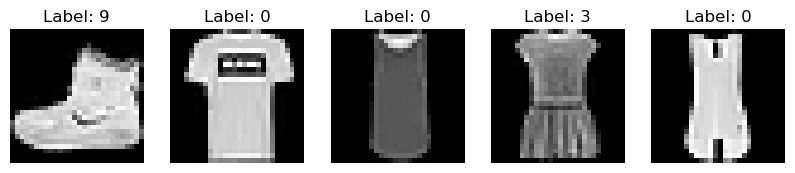

In [4]:
import matplotlib.pyplot as plt

# Definir el número de ejemplos a mostrar
num_examples = 5

# Crear una figura
plt.figure(figsize=(10, 2))

for i in range(num_examples):
    # Mostrar la imagen
    plt.subplot(1, num_examples, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()

### Primero sin Data Augmentation

Construimos el modelo con tres capas densas (128,64,10)

In [5]:
# Crear el modelo
model = keras.Sequential(
    [
        layers.Flatten(input_shape=(28, 28, 1)),  # Aplanar las imágenes de entrada
        layers.Dense(128, activation='relu'),     # Primera capa oculta con 128 neuronas
        layers.Dense(64, activation='relu'),      # Segunda capa oculta con 64 neuronas
        layers.Dense(10, activation='softmax')    # Capa de salida con 10 neuronas (una por cada clase)
    ]
)

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Mostrar un resumen del modelo
model.summary()

c:\Users\igome\anaconda3\envs\deepl\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.7624 - loss: 0.6821 - val_accuracy: 0.8408 - val_loss: 0.4391
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.8617 - loss: 0.3844 - val_accuracy: 0.8462 - val_loss: 0.4220
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8734 - loss: 0.3470 - val_accuracy: 0.8662 - val_loss: 0.3723
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8848 - loss: 0.3136 - val_accuracy: 0.8770 - val_loss: 0.3403
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8894 - loss: 0.3001 - val_accuracy: 0.8715 - val_loss: 0.3549
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8970 - loss: 0.2749 - val_accuracy: 0.8710 - val_loss: 0.3693
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8995 - loss: 0.2723 - val_accuracy: 0.8834 - val_loss: 0.3399
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9019 - 

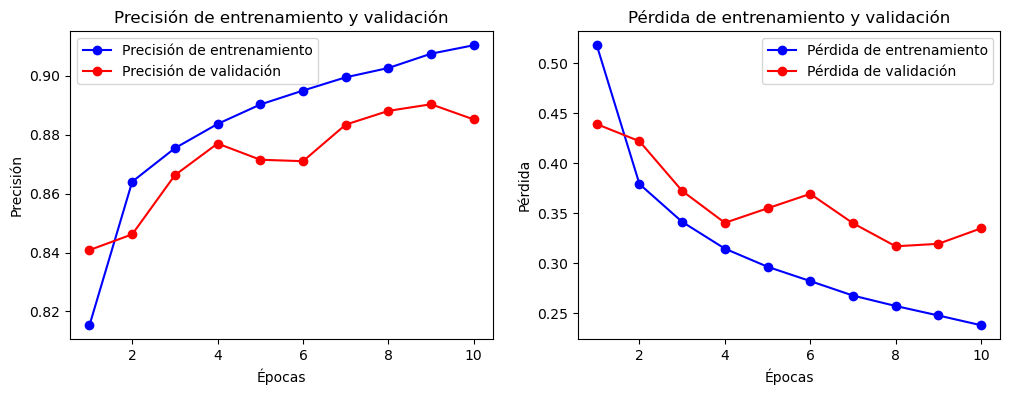

In [7]:
import matplotlib.pyplot as plt

# Obtener los datos de entrenamiento del historial
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Dibujar las curvas de precisión
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Precisión de entrenamiento')
plt.plot(epochs, val_acc, 'ro-', label='Precisión de validación')
plt.title('Precisión de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Dibujar las curvas de pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Pérdida de entrenamiento')
plt.plot(epochs, val_loss, 'ro-', label='Pérdida de validación')
plt.title('Pérdida de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

### Definir el Data Augmentation Pipeline

creamos un proceso sencillo de data augmentation utilizando las capas de preproceso de keras. Aleatoriamente tota, amplia y voltea las imagenes.

In [9]:

import numpy as np 
# Data augmentation pipeline
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
    ]
)

# Duplicamos los casos, ya que el aumentador nos los va a variar
x_train_big = np.repeat(x_train, 4, axis=0)
y_train_big = np.repeat(y_train, 4, axis=0)

In [11]:
print("x_train_big shape:", x_train_big.shape)

x_train_big shape: (240000, 28, 28, 1)


### Construir el modelo

El mismo modelo con tres capas densas (128,64,10)


In [12]:
# Crear el modelo con data augmentation
model_with_augmentation = keras.Sequential(
    [
        data_augmentation,                     # Capa de data augmentation
        layers.Flatten(input_shape=(28, 28, 1)),  # Aplanar las imágenes de entrada
        layers.Dense(128, activation='relu'),     # Primera capa oculta con 128 neuronas
        layers.Dense(64, activation='relu'),      # Segunda capa oculta con 64 neuronas
        layers.Dense(10, activation='softmax')    # Capa de salida con 10 neuronas (una por cada clase)
    ]
)

# Compilar el modelo
model_with_augmentation.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Mostrar un resumen del modelo
model_with_augmentation.summary()

c:\Users\igome\anaconda3\envs\deepl\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Entrenar el modelo con data augmentation
history_with_augmentation = model_with_augmentation.fit(x_train_big, y_train_big, epochs=10, validation_split=0.2)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 812s 135ms/step - accuracy: 0.6413 - loss: 0.9751 - val_accuracy: 0.7546 - val_loss: 0.6529
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 854s 142ms/step - accuracy: 0.7525 - loss: 0.6762 - val_accuracy: 0.7843 - val_loss: 0.5735
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 862s 144ms/step - accuracy: 0.7757 - loss: 0.6139 - val_accuracy: 0.7891 - val_loss: 0.5690
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 780s 130ms/step - accuracy: 0.7835 - loss: 0.5851 - val_accuracy: 0.8058 - val_loss: 0.5459
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 811s 135ms/step - accuracy: 0.7914 - loss: 0.5652 - val_accuracy: 0.8065 - val_loss: 0.5395
Epoch 6/10
 986/6000 ━━━━━━━━━━━━━━━━━━━━ 11:22 136ms/step - accuracy: 0.7955 - loss: 0.5513

KeyboardInterrupt: 

In [ ]:
# Obtener los datos de entrenamiento del historial con data augmentation
acc_aug = history_with_augmentation.history['accuracy']
val_acc_aug = history_with_augmentation.history['val_accuracy']
loss_aug = history_with_augmentation.history['loss']
val_loss_aug = history_with_augmentation.history['val_loss']

# Dibujar las curvas de precisión
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc_aug, 'bo-', label='Precisión de entrenamiento (Aug)')
plt.plot(epochs, val_acc_aug, 'ro-', label='Precisión de validación (Aug)')
plt.title('Precisión de entrenamiento y validación con Data Augmentation')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Dibujar las curvas de pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs, loss_aug, 'bo-', label='Pérdida de entrenamiento (Aug)')
plt.plot(epochs, val_loss_aug, 'ro-', label='Pérdida de validación (Aug)')
plt.title('Pérdida de entrenamiento y validación con Data Augmentation')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()